Name: Yatharth Thakare <br>
Roll No: 51 <br>
PRN: 12111403

# Implement Simple Neural Network on MNIST Dataset




In [ ]:
import tensorflow as tp
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

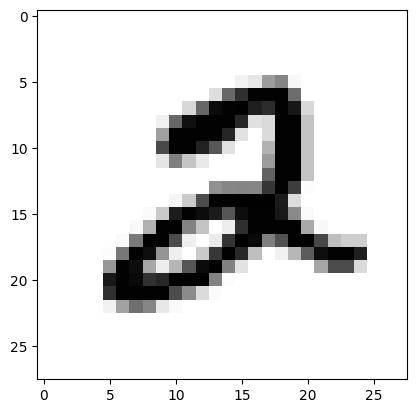

In [ ]:
plt.imshow(x_train[5],cmap='binary')
print(x_train[5])

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print(y_train[5],y_train_encoded[5])
print(y_train[0],y_train_encoded[0])

2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print("y_train encoded shape ", y_train_encoded.shape)
print("y_test encoded shape ", y_test_encoded.shape)

y_train encoded shape  (60000, 10)
y_test encoded shape  (10000, 10)


#Preprocessing

In [ ]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [ ]:
# display pixel value
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [ ]:
# Data normalization
import math
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = pow(math.e,-10)


In [ ]:
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

#MODEL


In [ ]:
#Creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#compiling model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#Training the model
model.fit(x_train_norm , y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8896
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1841 - accuracy: 0.9468
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1394 - accuracy: 0.9592


#Evaluation

In [ ]:
#Evaluating the model
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Testset Accuracy=',accuracy*100)

313/313 [==============================] - 1s 1ms/step - loss: 0.1321 - accuracy: 0.9593
Testset Accuracy= 95.92999815940857


In [ ]:
pred = model.predict([x_test_norm])
pred[2]

313/313 [==============================] - 0s 1ms/step


array([1.1927241e-05, 9.9268311e-01, 8.9838478e-04, 9.9857000e-04,
       4.7484660e-04, 6.0008519e-04, 5.9504062e-05, 2.6917162e-03,
       1.4493009e-03, 1.3253753e-04], dtype=float32)

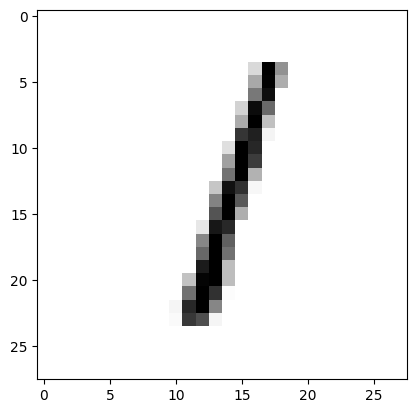

In [ ]:
plt.imshow(x_test[2],cmap='binary')